In [1]:
import numpy as np
from get_coords import get_coords

import matplotlib.pyplot as plt

In [4]:
coords = get_coords('16pkA01')
coords

array([[5, 'GLU', 'E', ..., -15.953, 21.156, 16.122],
       [5, 'GLU', 'E', ..., -15.944, 19.956, 15.229],
       [5, 'GLU', 'E', ..., -16.724, 20.23, 13.94],
       ...,
       [192, 'LEU', 'L', ..., -6.902, 31.661, 16.767],
       [192, 'LEU', 'L', ..., -5.748, 32.421, 16.114],
       [192, 'LEU', 'L', ..., -7.745, 30.979, 15.701]], dtype=object)

## What are the distances between neigboring atoms? What about same atoms?
`C-N` `N-CA` `CA-C` `CA-CB`

`C--C` `CA--CA` `N--N`

In [22]:
np.array([list(i) for i in coords if i[3] in ['CA', 'CA']])

array([['5', 'GLU', 'E', ..., '-15.944', '19.956', '15.229'],
       ['6', 'LYS', 'K', ..., '-12.271', '20.198', '14.247'],
       ['7', 'LYS', 'K', ..., '-9.788', '18.972', '16.853'],
       ...,
       ['190', 'GLY', 'G', ..., '-4.576', '26.528', '17.539'],
       ['191', 'TYR', 'Y', ..., '-6.648', '29.046', '19.537'],
       ['192', 'LEU', 'L', ..., '-6.902', '31.661', '16.767']],
      dtype='<U21')

In [124]:
def compute_dist(coords, atom1, atom2):
    dist_vec = []
    
    # filter 
    c = np.array([list(i) for i in coords if i[3] in [atom1, atom2]])
    
    if atom1 == atom2:
        for i in range(len(c) - 1):
            a1, a2 = c[i, 4:].astype(np.float), c[i + 1, 4:].astype(np.float)
            
            if atom1 == 'CB' and c[i + 1, 0].astype(np.int) - c[i, 0].astype(np.int) > 1:
                pass
            else:
                dist_vec.append(np.sqrt(sum((a1 - a2)**2)))
    else:
        it = 0
        for i in range(len(c)//2 - 1):
            if (atom1 == 'C' and atom2 == 'N') or (atom1 == 'N' and atom2 == 'C'):
                a1, a2 = c[it + 2, 4:].astype(np.float), c[it + 1, 4:].astype(np.float)
            
            elif (atom1 == 'CA' and atom2 == 'CB') or (atom1 == 'CB' and atom2 == 'CA'):
                if c[it, 0].astype(np.float) == c[it + 1, 0].astype(np.float):
                    a1, a2 = c[it, 4:].astype(np.float), c[it + 1, 4:].astype(np.float)
            else:
                a1, a2 = c[it, 4:].astype(np.float), c[it + 1, 4:].astype(np.float)

            dist_vec.append(np.sqrt(sum((a1 - a2)**2)))
            it += 2
        
    return np.array(dist_vec)

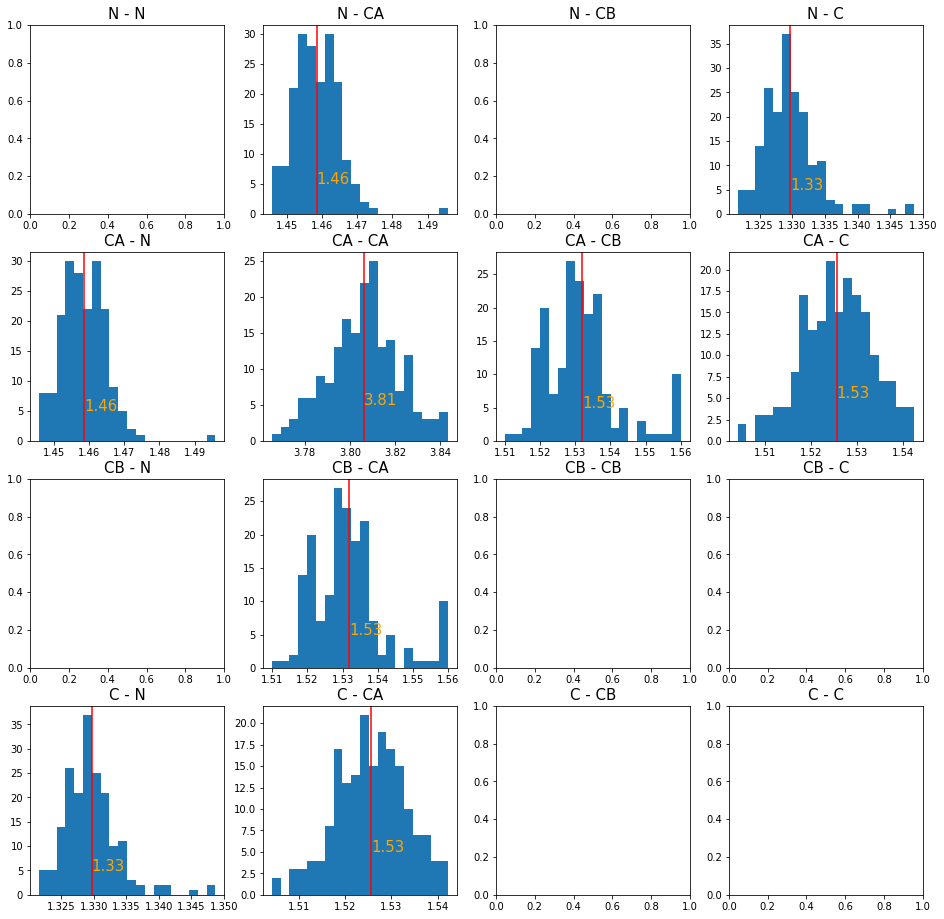

In [116]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))

atoms = ['N', 'CA', 'CB', 'C']

for i in range(len(atoms)):
    for j in range(len(atoms)):
        if (atoms[i] == 'CB' and atoms[j] not in ['CA', 'CB']) or (atoms[j] == 'CB' and atoms[i] not in ['CA', 'CB']):
            ax[i, j].set_title(f'{atoms[i]} - {atoms[j]}', fontsize=15)
            
        elif atoms[i] == atoms[j] and atoms[i] != 'CA':
            ax[i, j].set_title(f'{atoms[i]} - {atoms[j]}', fontsize=15)
        else:
            dist = compute_dist(coords, atoms[i], atoms[j])
            ax[i, j].hist(dist, bins=20)
            ax[i, j].axvline(np.mean(dist), c='red')
            ax[i, j].text(np.mean(dist), 5, f'{round(np.mean(dist), 2)}', c='orange', fontsize=15)
            ax[i, j].set_title(f'{atoms[i]} - {atoms[j]}', fontsize=15)

## What are the angles (not torsion)?
`C-N-CA` `N-CA-C` `CA-C-N`

In [3]:
coords[np.where(coords[:, 0] == 1)[0]]

array([[1, 'MET', 'M', 'N', 44.133, -3.085, 9.414],
       [1, 'MET', 'M', 'CA', 43.503, -1.774, 9.316],
       [1, 'MET', 'M', 'CB', 43.529, -1.325, 7.82],
       [1, 'MET', 'M', 'C', 42.084, -1.9, 9.819]], dtype=object)

In [13]:
np.sqrt((42.084 - 44.133)**2 + (-1.9 + 3.085)**2 + (9.819 - 9.414)**2)

2.4013852252397987

In [131]:
def compute_angles(coords, angle_atoms):
    angle_vec = []
    
    # filter 
    c = np.array([list(i) for i in coords if i[3] != 'CB'])
       
    for i in range(len(c) - 3):
        if c[i, 3] == angle_atoms[0]:
            a1, a2, a3 = c[i, 4:].astype(np.float), c[i+1, 4:].astype(np.float), c[i+2, 4:].astype(np.float)
            
            v1, v2 = a2 - a1, a3 - a2            
            v1_size, v2_size = np.sqrt(np.sum(v1**2)), np.sqrt(np.sum(v2**2))
            
            angle = np.degrees(np.pi - np.arccos(np.sum(v1 * v2) / (v1_size * v2_size)))
            
            angle_vec.append(angle)
    return angle_vec

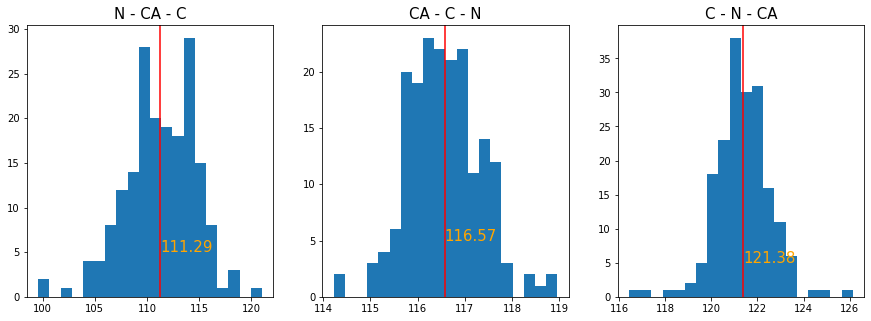

In [134]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for i, a in enumerate([('N', 'CA', 'C'), ('CA', 'C', 'N'), ('C', 'N', 'CA')]):
    angles = compute_angles(coords, a)
    ax[i].hist(angles, bins=20)
    ax[i].axvline(np.mean(angles), c='red')
    ax[i].text(np.mean(angles), 5, f'{round(np.mean(angles), 2)}', c='orange', fontsize=15)
    ax[i].set_title(f'{a[0]} - {a[1]} - {a[2]}', fontsize=15)